## Heat Exchanger Price Prediction Model

In [59]:
### Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Import dataset
data = pd.read_csv("F:\\python data analyst\\heat exchanger price predictor project\\dataset1.csv")

In [61]:
data.head()


,TTR part num,Part Level,Customer,Segment,End Customer,Category,Description,Core Thickness,Core Width,Core Height,Tube per core,Tank,Price
0,B1DQA5001M00,ECS,Cummins,Gen Set,OEM,Domestic,QSL-9,102.0,561.4,1100.0,252.0,Plastic,50867.0
1,A5SMA5001M00,ECS,Ashok Leyland,Commercial Vehicle,OEM,Domestic,Chassis Mounted Radiator,NaN,NaN,NaN,NaN,Plastic,50000.0
2,B1DQA5050M00,ECS,Cummins,Gen Set,OEM,Domestic,QSL-9,102.0,561.4,1100.0,252.0,Plastic,49170.0
3,A5RZA5001M00,ECS,Ashok Leyland,Commercial Vehicle,OEM,Domestic,Roof Mounted radiator,48.0,552.6,740.0,124.0,Plastic,46000.0
4,A0VDA5001M00,ECS,Tata Motors,Commercial Vehicle,OEM,Domestic,LPO 1515-62-WB,36.0,537.2,650.0,108.0,Plastic,44066.0


In [62]:
data.shape


(1364, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TTR part num    1364 non-null   object 
 1   Part Level      1364 non-null   object 
 2   Customer        1364 non-null   object 
 3   Segment         1364 non-null   object 
 4   End Customer    1364 non-null   object 
 5   Category        1364 non-null   object 
 6   Description     1364 non-null   object 
 7   Core Thickness  1104 non-null   float64
 8   Core Width      1104 non-null   float64
 9   Core Height     1104 non-null   float64
 10  Tube per core   1104 non-null   float64
 11  Tank            1364 non-null   object 
 12  Price           1364 non-null   float64
dtypes: float64(5), object(8)
memory usage: 138.7+ KB


In [64]:
data.isnull().sum()

TTR part num        0
Part Level          0
Customer            0
Segment             0
End Customer        0
Category            0
Description         0
Core Thickness    260
Core Width        260
Core Height       260
Tube per core     260
Tank                0
Price               0
dtype: int64

In [65]:
data.shape

(1364, 13)

In [66]:
data_new = data.dropna()

In [67]:
data_new.isnull().sum()

TTR part num      0
Part Level        0
Customer          0
Segment           0
End Customer      0
Category          0
Description       0
Core Thickness    0
Core Width        0
Core Height       0
Tube per core     0
Tank              0
Price             0
dtype: int64

In [68]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1363
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TTR part num    1104 non-null   object 
 1   Part Level      1104 non-null   object 
 2   Customer        1104 non-null   object 
 3   Segment         1104 non-null   object 
 4   End Customer    1104 non-null   object 
 5   Category        1104 non-null   object 
 6   Description     1104 non-null   object 
 7   Core Thickness  1104 non-null   float64
 8   Core Width      1104 non-null   float64
 9   Core Height     1104 non-null   float64
 10  Tube per core   1104 non-null   float64
 11  Tank            1104 non-null   object 
 12  Price           1104 non-null   float64
dtypes: float64(5), object(8)
memory usage: 120.8+ KB


In [69]:
data_new.describe()

,Core Thickness,Core Width,Core Height,Tube per core,Price
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,42.706341,509.052717,611.947011,99.005435,6676.901701
std,11.742686,112.817412,154.468325,36.569733,5801.950447
min,12.000000,74.800000,198.000000,5.000000,0.000000
25%,36.000000,486.700000,500.000000,80.000000,2841.520000
50%,48.000000,537.200000,590.000000,108.000000,5062.691154
75%,48.000000,552.600000,740.000000,124.000000,9755.285000
max,126.000000,834.900000,1100.000000,305.000000,50867.000000


In [70]:
pd.unique(data_new['Part Level'].values)

array(['ECS', 'Radiator', 'Core', 'CRFMS', 'RFMS', 'Intercooler'],
      dtype=object)

In [71]:
pd.unique(data_new['Customer'].values)

array(['Cummins', 'Ashok Leyland', 'Tata Motors', 'Kirloskar', 'MWM',
       'Mahindra Powerol', 'Greaves', 'JBM', 'TMTL', 'Volvo Eicher',
       'Mahindra Tractors', 'Volvo', 'Kubota', 'Kamaz Vectra',
       'Force Motors', 'MTBD', 'Daimler', 'PSA', 'General Motors',
       'John Deere', 'Swaraj', 'M&M', 'New Holland', 'Sonalika', 'Honda',
       'Isuzu', 'CNH', 'Tafe', 'TAFE', 'Piaggio', 'Renault'], dtype=object)

In [72]:
pd.unique(data_new['Segment'].values)

array(['Gen Set', 'Commercial Vehicle', 'Tractor', 'Passenger Car',
       '3 Wheeler'], dtype=object)

In [73]:
pd.unique(data_new['Category'].values)

array(['Domestic', 'Export'], dtype=object)

C:\Users\aryan\AppData\Local\Temp\ipykernel_8584\2127530206.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new.Price)


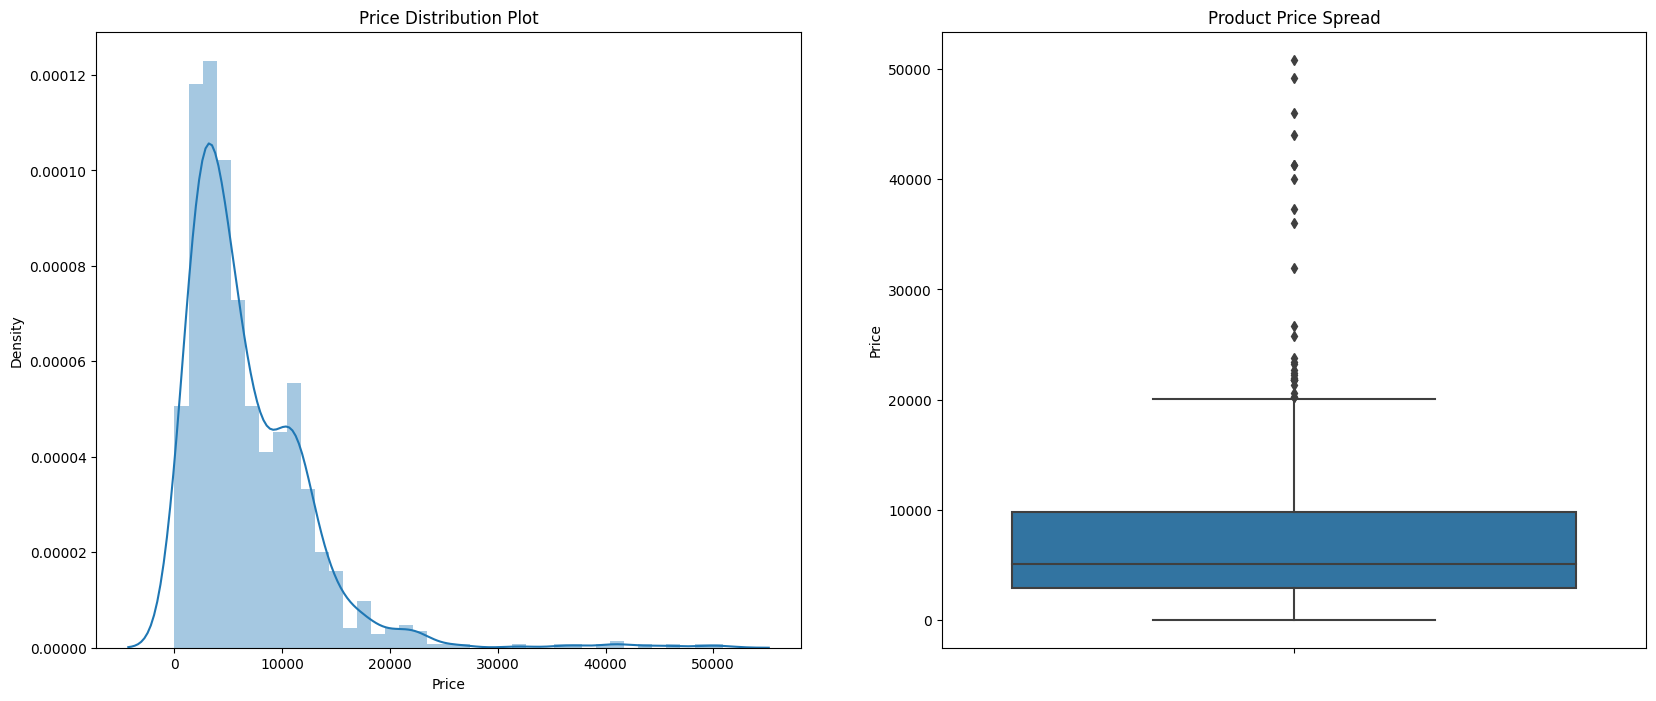

In [74]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(data_new.Price)

plt.subplot(1,2,2)
plt.title('Product Price Spread')
sns.boxplot(y=data_new.Price)

plt.show()

In [75]:
data_new.Price.describe()

count     1104.000000
mean      6676.901701
std       5801.950447
min          0.000000
25%       2841.520000
50%       5062.691154
75%       9755.285000
max      50867.000000
Name: Price, dtype: float64

In [76]:
data_new.rename(index=str, columns={'TTR part num': 'partcode',
                              'Part Level' : 'part_level',
                              'Customer' : 'customer',
                              'Segment' : 'segment',
                              'End Customer' : 'end_customer',
                              'Category' : 'category',
                              'Description' : 'description',
                              'Core Thickness' : 'core_thickness',
                                'Core Width' : 'core_width',
                              'Core Height' : 'core_height',
                              'Fin Type' : 'fin_type',
                              'Tube per core' : 'tube_per_core',
                                'Tank' : 'tank',
                              'Price' : 'price'}, inplace=True)
data_new = data_new.copy()
data_new.rename(index=str, columns={'TTR part num': 'partcode'}, inplace=True)


C:\Users\aryan\AppData\Local\Temp\ipykernel_8584\1150659959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.rename(index=str, columns={'TTR part num': 'partcode',


In [77]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1363
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   partcode        1104 non-null   object 
 1   part_level      1104 non-null   object 
 2   customer        1104 non-null   object 
 3   segment         1104 non-null   object 
 4   end_customer    1104 non-null   object 
 5   category        1104 non-null   object 
 6   description     1104 non-null   object 
 7   core_thickness  1104 non-null   float64
 8   core_width      1104 non-null   float64
 9   core_height     1104 non-null   float64
 10  tube_per_core   1104 non-null   float64
 11  tank            1104 non-null   object 
 12  price           1104 non-null   float64
dtypes: float64(5), object(8)
memory usage: 120.8+ KB


In [78]:
del data_new['partcode']

In [79]:
del data_new['description']

In [80]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1363
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   part_level      1104 non-null   object 
 1   customer        1104 non-null   object 
 2   segment         1104 non-null   object 
 3   end_customer    1104 non-null   object 
 4   category        1104 non-null   object 
 5   core_thickness  1104 non-null   float64
 6   core_width      1104 non-null   float64
 7   core_height     1104 non-null   float64
 8   tube_per_core   1104 non-null   float64
 9   tank            1104 non-null   object 
 10  price           1104 non-null   float64
dtypes: float64(5), object(6)
memory usage: 103.5+ KB


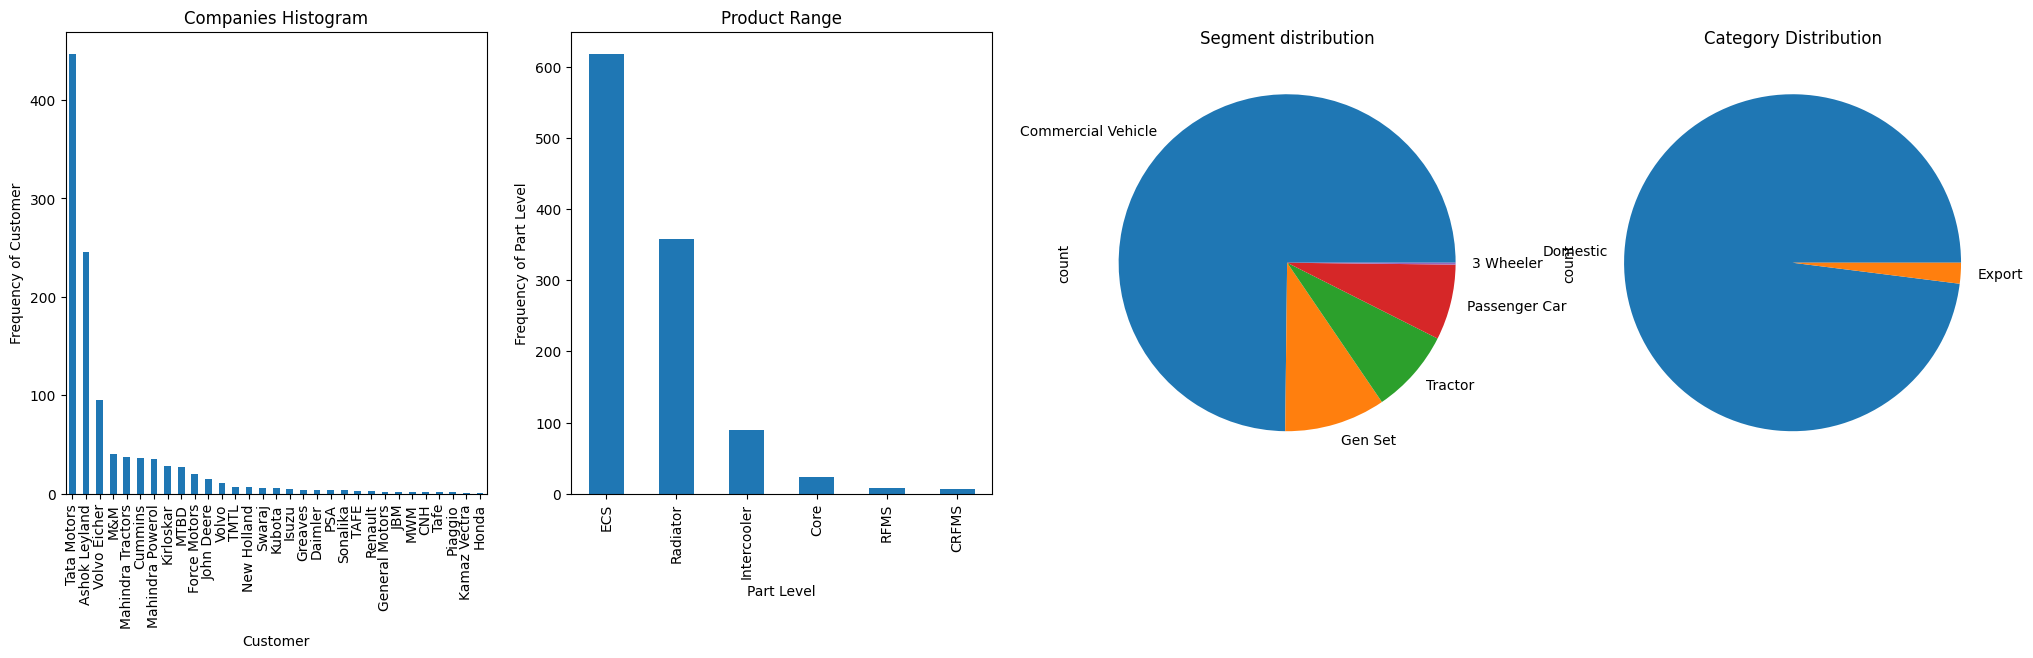

In [81]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = data_new.customer.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Customer', ylabel='Frequency of Customer')

plt.subplot(1,4,2)
plt1 = data_new.part_level.value_counts().plot(kind='bar')
plt.title('Product Range')
plt1.set(xlabel = 'Part Level', ylabel='Frequency of Part Level')

plt.subplot(1,4,3)
plt1 = data_new.segment.value_counts().plot(kind='pie')
plt.title('Segment distribution')

plt.subplot(1,4,4)
plt1 = data_new.category.value_counts().plot(kind='pie')
plt.title('Category Distribution')

plt.show()

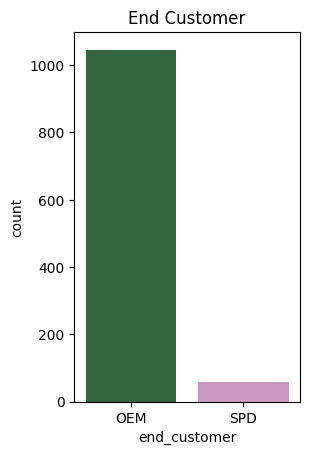

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'end_customer' column to a categorical data type
data_new['end_customer'] = data_new['end_customer'].astype('category')

# Create the countplot
plt.subplot(1, 2, 1)
plt.title('End Customer')
sns.countplot(data=data_new, x='end_customer', palette='cubehelix')

# Rest of your plotting code
# ...

# Show the plot
plt.show()


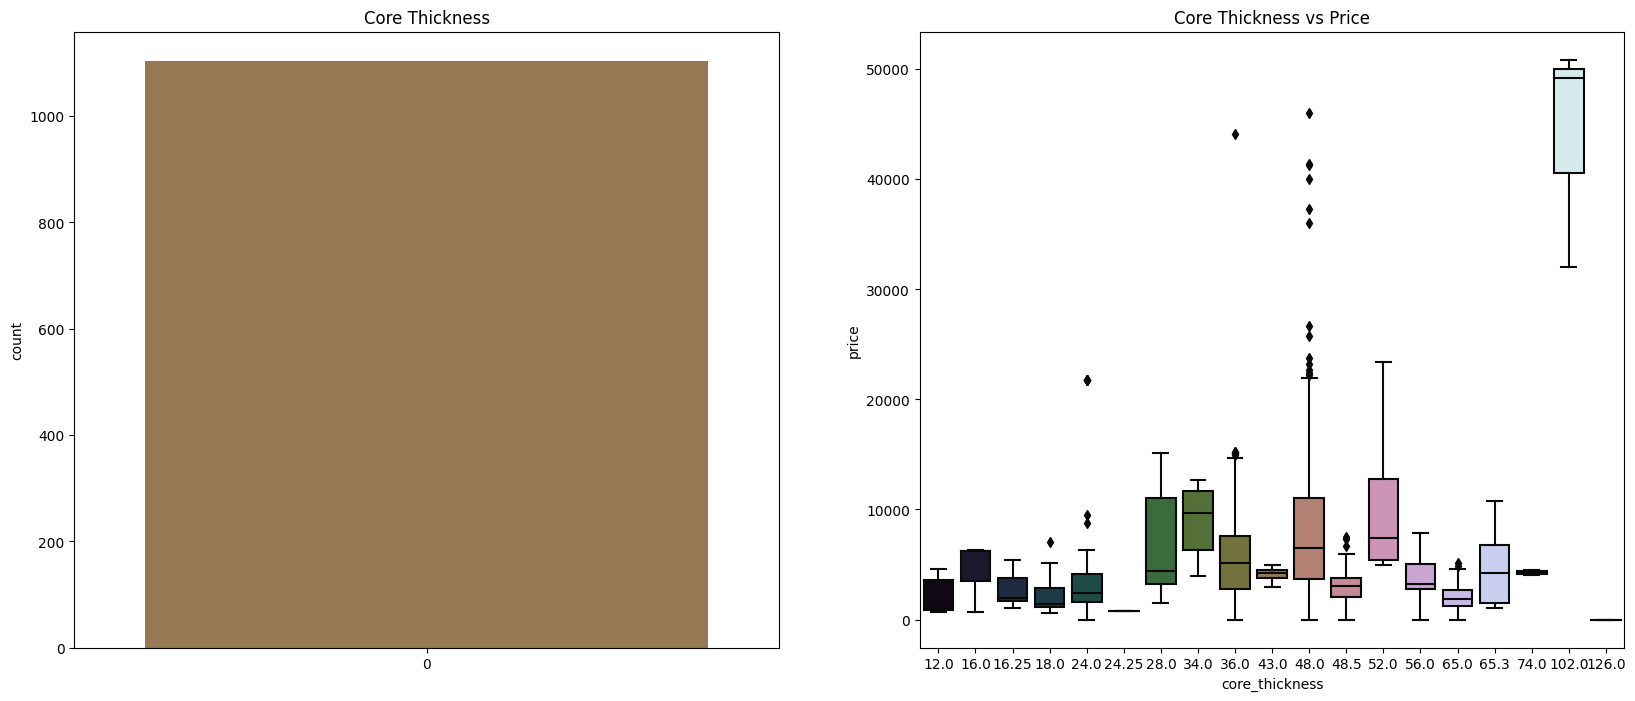

In [83]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Core Thickness')
sns.countplot(data_new.core_thickness, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Core Thickness vs Price')
sns.boxplot(x=data_new.core_thickness, y=data_new.price, palette=("cubehelix"))

plt.show()

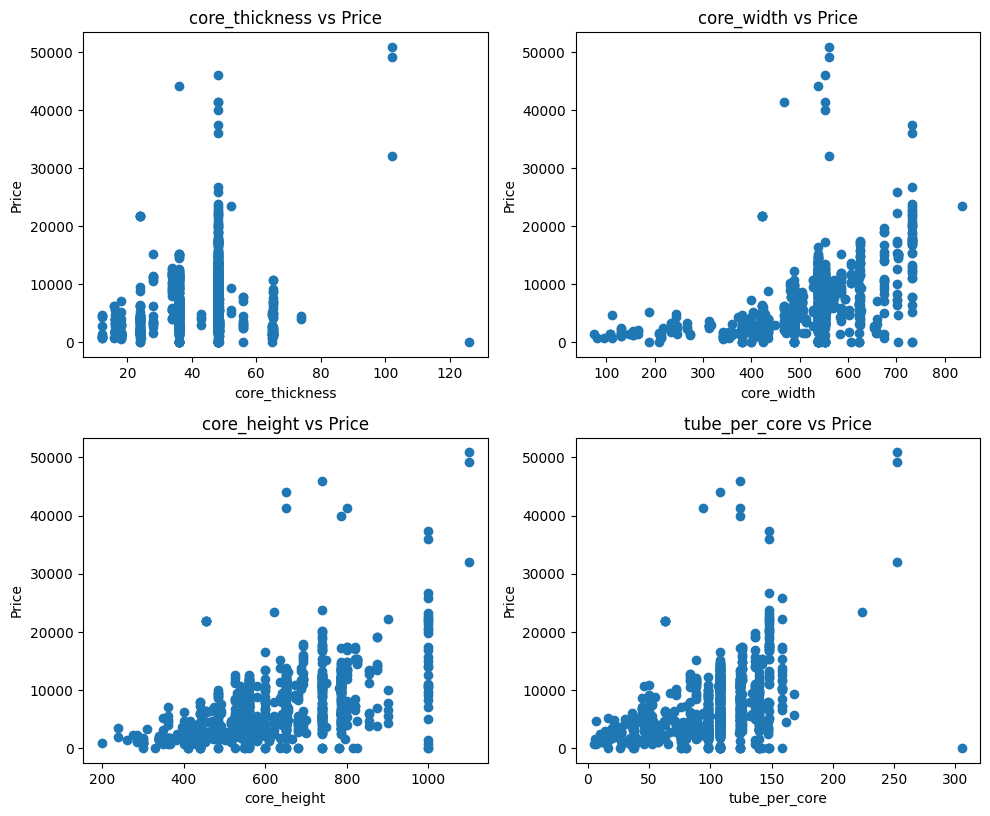

In [84]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data_new[x],data_new['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('core_thickness', 1)
scatter('core_width', 2)
scatter('core_height', 3)
scatter('tube_per_core', 4)

plt.tight_layout()

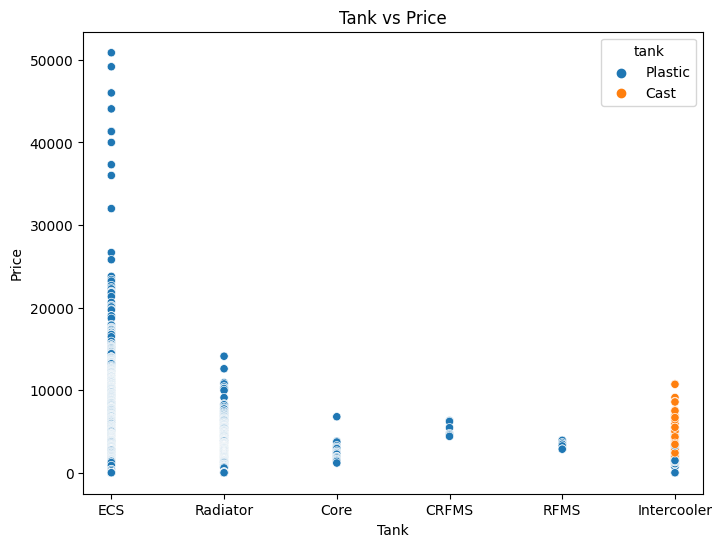

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(8,6))

plt.title('Tank vs Price')
sns.scatterplot(x=data_new['part_level'],y=data_new['price'],hue=data_new['tank'])
plt.xlabel('Tank')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

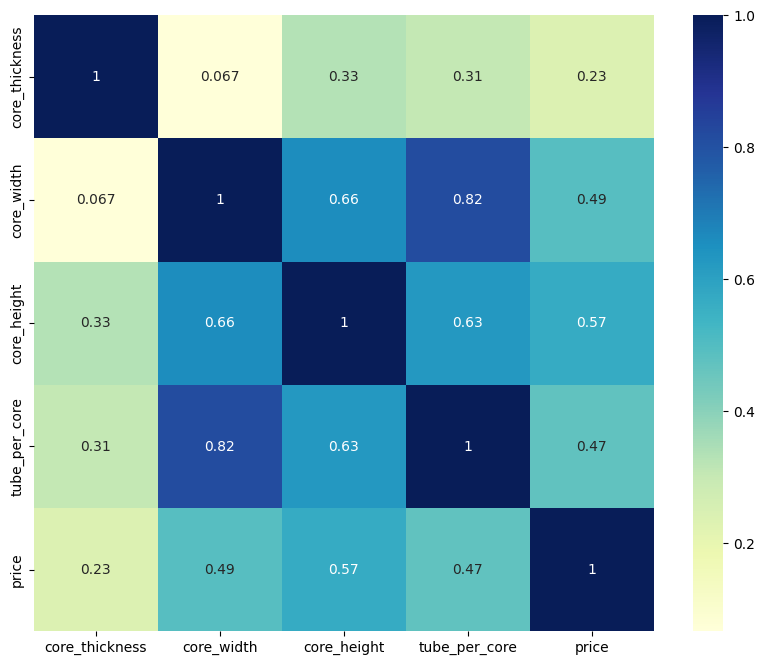

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific numeric columns for correlation
numeric_columns = data_new.select_dtypes(include='number')

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [87]:

data1 = data_new[['part_level', 'segment','end_customer', 'category','core_thickness',
                  'core_width', 'core_height','tube_per_core', 'tank','price']]

In [88]:
data1.head()

,part_level,segment,end_customer,category,core_thickness,core_width,core_height,tube_per_core,tank,price
0,ECS,Gen Set,OEM,Domestic,102.0,561.4,1100.0,252.0,Plastic,50867.00
2,ECS,Gen Set,OEM,Domestic,102.0,561.4,1100.0,252.0,Plastic,49170.00
3,ECS,Commercial Vehicle,OEM,Domestic,48.0,552.6,740.0,124.0,Plastic,46000.00
4,ECS,Commercial Vehicle,OEM,Domestic,36.0,537.2,650.0,108.0,Plastic,44066.00
5,ECS,Commercial Vehicle,OEM,Domestic,48.0,552.6,650.0,124.0,Plastic,41342.77


In [89]:
data1.columns

Index(['part_level', 'segment', 'end_customer', 'category', 'core_thickness',
       'core_width', 'core_height', 'tube_per_core', 'tank', 'price'],
      dtype='object')

In [90]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

data1 = dummies('part_level',data1)
data1 = dummies('segment',data1)
data1 = dummies('end_customer',data1)
data1 = dummies('category',data1)

In [91]:
data1.head()

,core_thickness,core_width,core_height,tube_per_core,tank,price,Core,ECS,Intercooler,RFMS,Radiator,Commercial Vehicle,Gen Set,Passenger Car,Tractor,SPD,Export
0,102.0,561.4,1100.0,252.0,Plastic,50867.00,False,True,False,False,False,False,True,False,False,False,False
2,102.0,561.4,1100.0,252.0,Plastic,49170.00,False,True,False,False,False,False,True,False,False,False,False
3,48.0,552.6,740.0,124.0,Plastic,46000.00,False,True,False,False,False,True,False,False,False,False,False
4,36.0,537.2,650.0,108.0,Plastic,44066.00,False,True,False,False,False,True,False,False,False,False,False
5,48.0,552.6,650.0,124.0,Plastic,41342.77,False,True,False,False,False,True,False,False,False,False,False


In [92]:
data1.shape

(1104, 17)

In [93]:
X = data1.drop('price', axis=1)
X = data1.drop('tank', axis=1)
X.head()

,core_thickness,core_width,core_height,tube_per_core,price,Core,ECS,Intercooler,RFMS,Radiator,Commercial Vehicle,Gen Set,Passenger Car,Tractor,SPD,Export
0,102.0,561.4,1100.0,252.0,50867.00,False,True,False,False,False,False,True,False,False,False,False
2,102.0,561.4,1100.0,252.0,49170.00,False,True,False,False,False,False,True,False,False,False,False
3,48.0,552.6,740.0,124.0,46000.00,False,True,False,False,False,True,False,False,False,False,False
4,36.0,537.2,650.0,108.0,44066.00,False,True,False,False,False,True,False,False,False,False,False
5,48.0,552.6,650.0,124.0,41342.77,False,True,False,False,False,True,False,False,False,False,False


In [94]:
y= data1[['price']]
y.head()

,price
0,50867.00
2,49170.00
3,46000.00
4,44066.00
5,41342.77


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\aryan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [97]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 62.199672230441756
R2 Score: 0.9962803909031899


In [98]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\aryan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [101]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.010681030559280111
R2 Score: 0.9966420208663109
